In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [3]:
rates_tbl = pd.read_csv("../../Fig1d/1d_edit_rates_merged.csv")

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/s

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/s

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/s

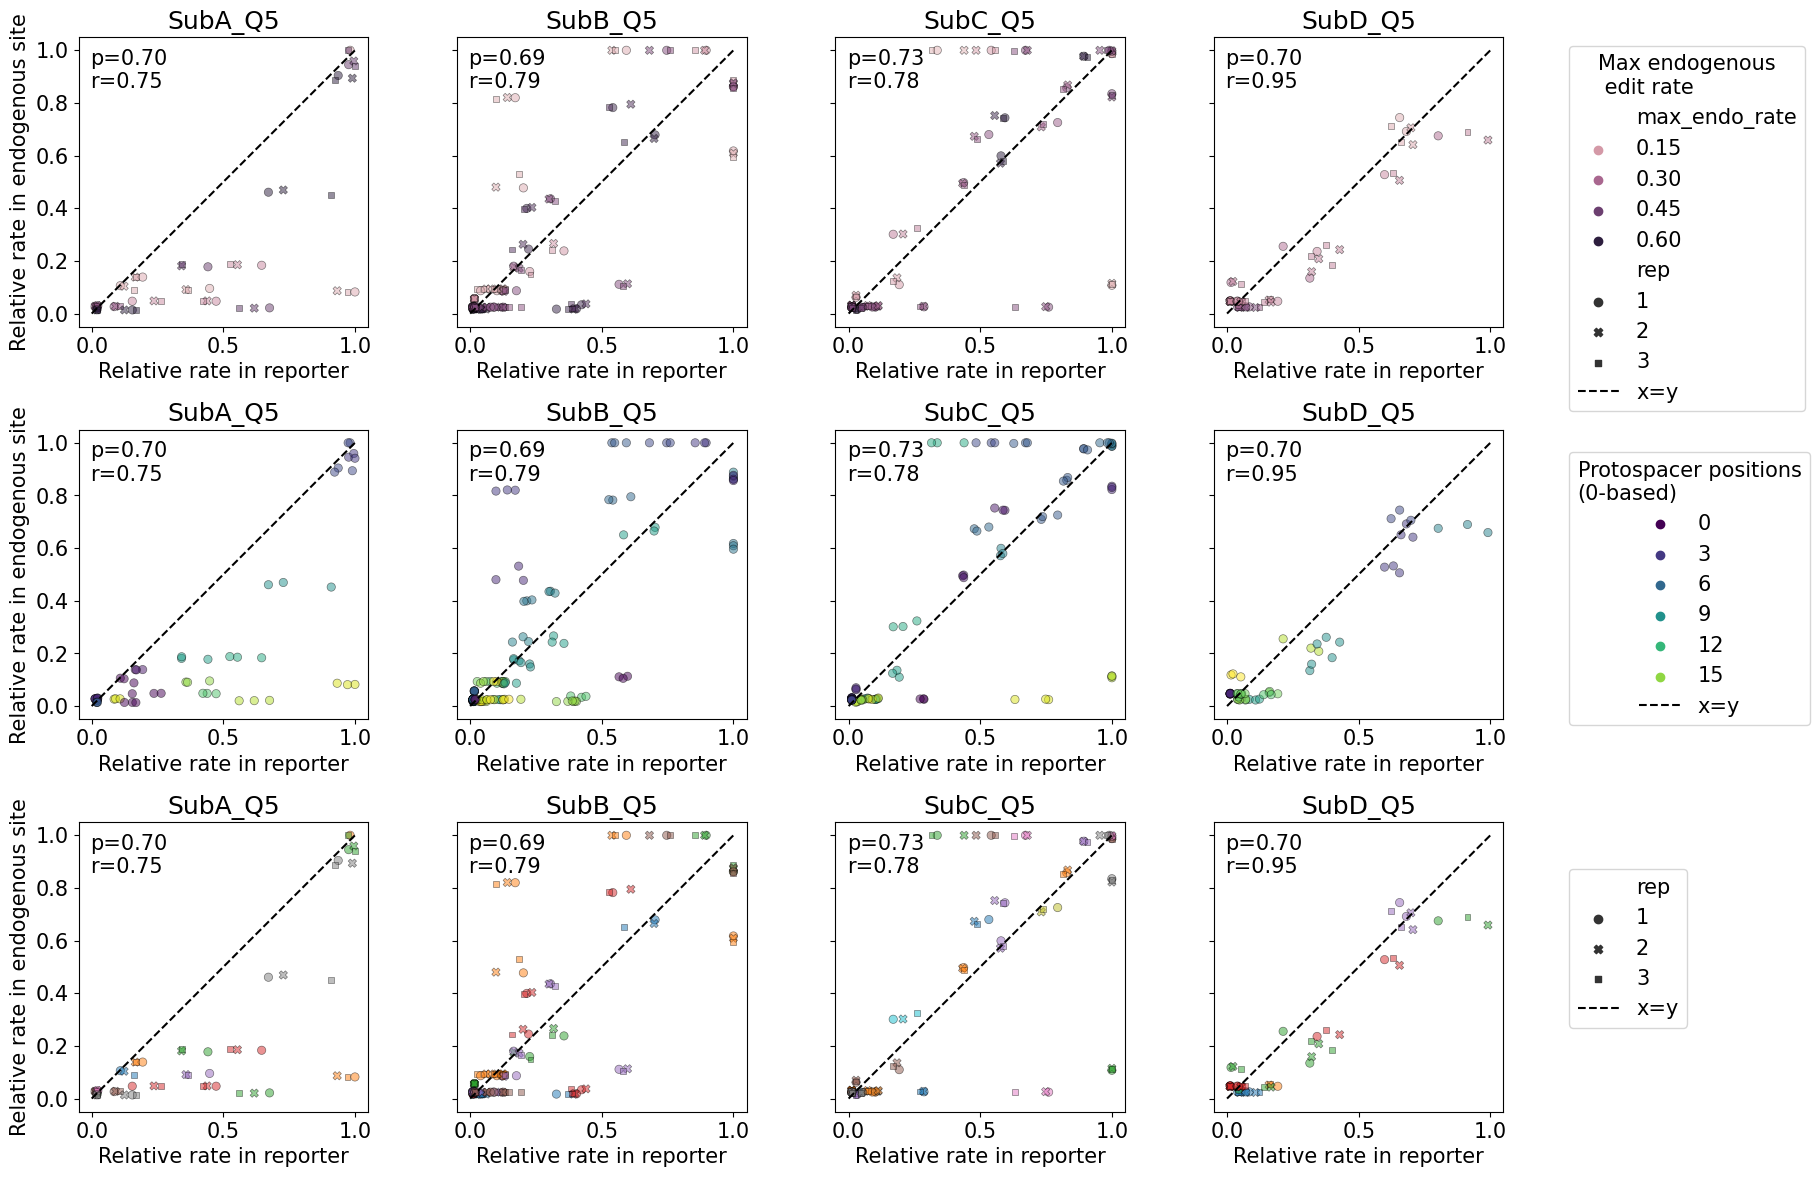

In [6]:
libs = [f"Sub{l}_Q5" for l in ["A", "B", "C", "D"]]
fig, ax = plt.subplots(3, len(libs), figsize=(len(libs)*4, 12), sharey=True)
for i, lib in enumerate(libs):
    d_rates = rates_tbl.loc[(rates_tbl.lib == lib) & (rates_tbl.pos < 19)].copy()
    max_rate_per_guide= d_rates.groupby(["guide", "rep"])[["endo", "reporter"]].max()
    d_rates["max_endo_rate"] = d_rates.apply(lambda row: max_rate_per_guide.loc[(row.guide, row.rep), "endo"], axis=1)
    d_rates["max_reporter_rate"] = d_rates.apply(lambda row: max_rate_per_guide.loc[(row.guide, row.rep), "reporter"], axis=1)
    d_rates = d_rates.loc[d_rates["max_endo_rate"]>0.05,:]
    d_rates.groupby('guide')['edit'].nunique().value_counts()
    d_rates["rel_endo_padded"] = (d_rates["endo"]+0.01) / (d_rates["max_endo_rate"]+0.01)
    d_rates["rel_reporter_padded"] = (d_rates["reporter"]+0.01) / (d_rates["max_reporter_rate"]+0.01)
    df = d_rates.loc[~((d_rates.rel_endo_padded == 1) & (d_rates.rel_reporter_padded == 1))]
    sns.scatterplot(df, y="rel_endo_padded", x="rel_reporter_padded", alpha = 0.5, ax = ax[0, i], hue = "max_endo_rate", hue_norm=((0,0.6)), style="rep", edgecolor="black")
    sns.scatterplot(df, y="rel_endo_padded", x="rel_reporter_padded", alpha = 0.5, ax = ax[1, i], hue = "pos", palette='viridis', hue_norm=((0,18)), edgecolor="black")
    sns.scatterplot(df, y="rel_endo_padded", x="rel_reporter_padded", alpha = 0.5, ax = ax[2, i], hue = "guide", style="rep", edgecolor="black")
    for j in range(3):
        ax[j, i].plot([0,1],[0,1], linestyle="--", color='black', label="x=y")
        ax[j, i].set_title(f"{lib}")
        ax[j, i].get_legend().remove()
        ax[j, i].text(0.04, 0.96, f"p={spearmanr(df.rel_endo_padded, df.rel_reporter_padded)[0]:.2f}", verticalalignment="top", transform=ax[j, i].transAxes)
        ax[j, i].text(0.04, 0.88, f'r={df[["rel_endo_padded", "rel_reporter_padded"]].corr().iloc[0, 1]:.2f}', verticalalignment="top", transform=ax[j, i].transAxes)
plt.setp(ax, box_aspect=1, xlabel="Relative rate in reporter", ylabel="Relative rate in endogenous site")

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1,0.8), title="Max endogenous\n edit rate")
handles, labels = ax[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1,0.5), title="Protospacer positions\n(0-based)")
handles, labels = ax[2, 0].get_legend_handles_labels()
fig.legend(handles[9:], labels[9:], loc="center left", bbox_to_anchor=(1,0.2), title=None)
plt.tight_layout()
fig.savefig("rel_editrate_by_acc.pdf", bbox_inches="tight")